<a href="https://colab.research.google.com/github/dhananjayjamwal78/dhananjayjamwal78/blob/main/Copy_of_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from teaching_tools.widgets import ConfusionMatrixWidget

In [ ]:
!pip install teaching_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.0/251.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 23.1 MB/s eta 0:00:00
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803682 sha256=84a74b2ce27ac590925c2fcbda37b03322a85a2ed9745a4a9b397ffc8def50c7
  Stored in directory: /root/.cache/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=1b597fd38bdc2a7355002d93d7e29094d7ef2e5203ef31fbc5ca3d4c4292f041
  Stored in directory: 

In [ ]:
!pip install category_encoders


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
df = pd.read_csv("/content/framingham.csv")

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x="age",data=df,hue="education")

In [ ]:
sns.scatterplot(x="age",y="heartRate",hue="currentSmoker",data=df)

<Axes: >

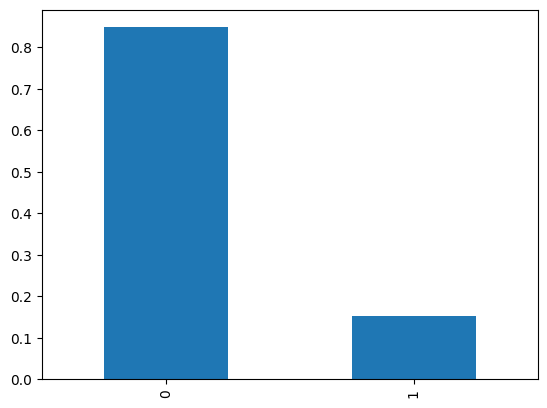

In [ ]:
df["TenYearCHD"].value_counts(normalize=True).plot(kind="bar")

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

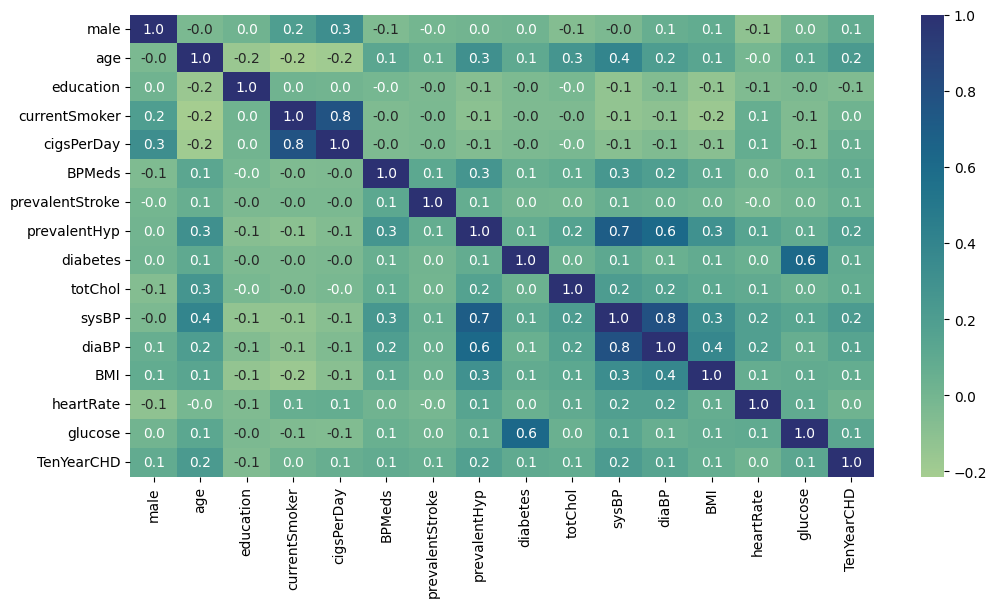

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt='.1f', cmap = "crest")

In [ ]:
print(df["TenYearCHD"].value_counts())

In [ ]:
X = df.drop(columns = "TenYearCHD")
Y = df.TenYearCHD

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
model = make_pipeline(
    SimpleImputer(),
    OneHotEncoder(),
    LogisticRegression(max_iter=1000,solver="liblinear")

)
model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('onehotencoder', OneHotEncoder(cols=[])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
model.score(X_test,y_test)

0.8596698113207547

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size = 0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,y_train, test_size = 0.2, random_state=42
)

In [ ]:
df1 = pd.read_csv("/content/HR-Employee-Attrition.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df1["Attrition"][0]

'Yes'

In [ ]:
df1["Attrition"]=(df1["Attrition"]=="Yes").astype(int)

In [ ]:
df1.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
df1["Attrition"].value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
df1.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<ipython-input-17-b0fbb29775a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<Axes: >

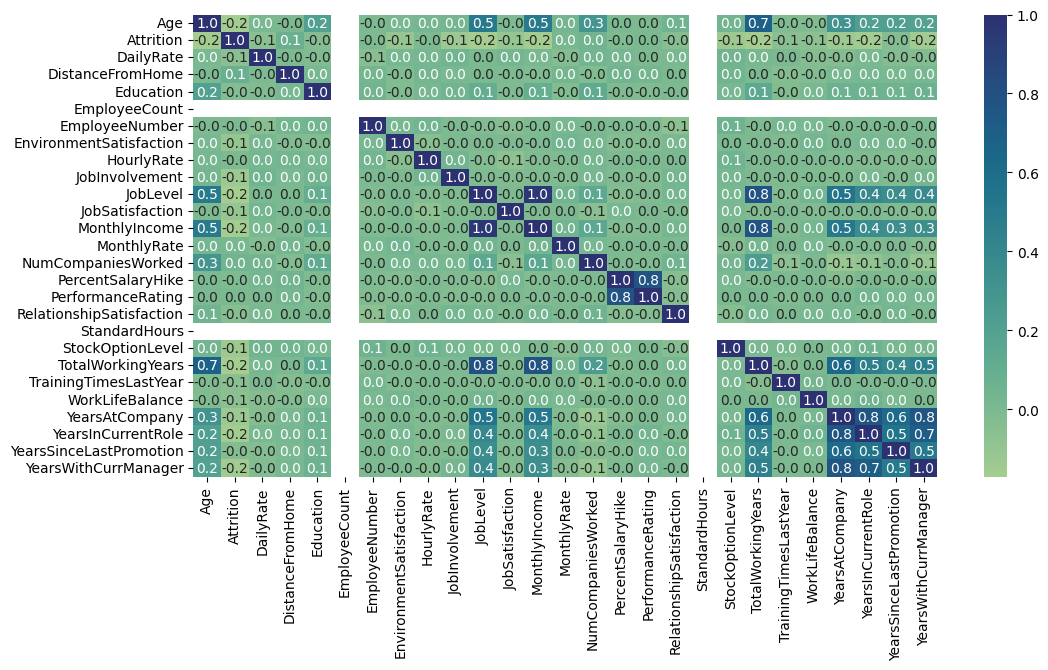

In [ ]:
corr = df1.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt='.1f', cmap = "crest")

In [ ]:
X = df1.drop(columns = ["Attrition","JobLevel","TotalWorkingYears","YearsAtCompany","YearsWithCurrManager"])
Y = df1.Attrition

<ipython-input-19-adf3f3267d4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X.corr()


<Axes: >

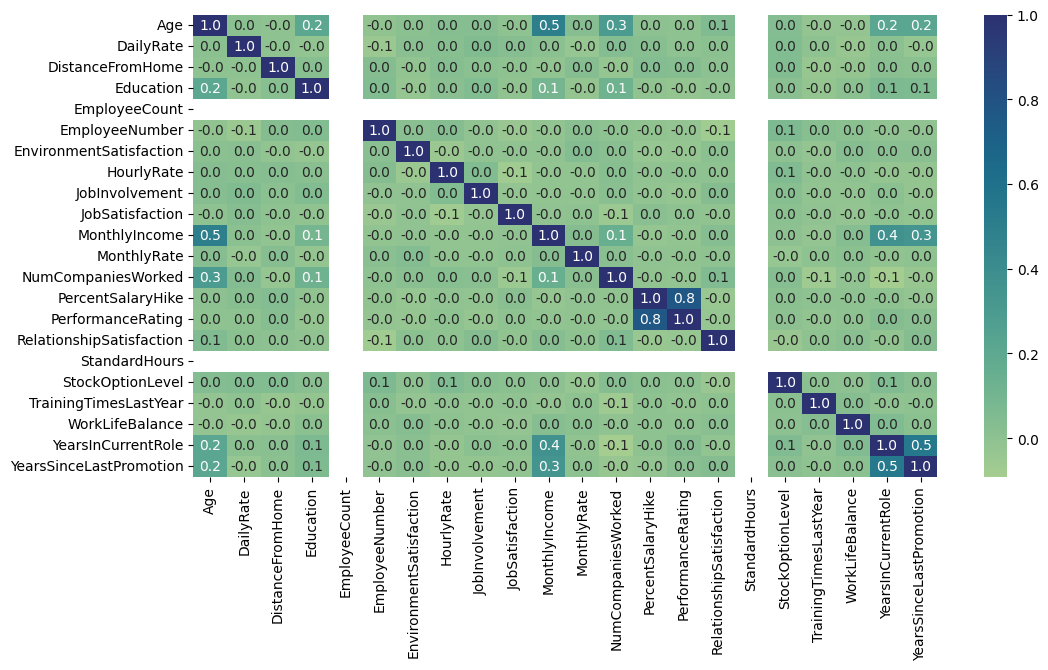

In [ ]:
corr = X.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt='.1f', cmap = "crest")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(max_iter=1000,solver="liblinear")
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['BusinessTravel', 'Department',
                                     'EducationField', 'Gender', 'JobRole',
                                     'MaritalStatus', 'Over18', 'OverTime'])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
model.score(X_test,y_test)

0.8571428571428571

(2224, 30)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,22,Travel_Frequently,1368,Research & Development,4,1,Technical Degree,1,593,3,...,No,16,3,3,80,0,3,3,2,1
1,40,Travel_Rarely,444,Sales,2,2,Marketing,1,1986,2,...,No,14,3,3,80,1,4,3,8,5
2,33,Travel_Rarely,267,Research & Development,21,3,Medical,1,1698,2,...,No,18,3,4,80,3,6,3,11,2
3,51,Travel_Rarely,1169,Research & Development,7,4,Medical,1,211,2,...,No,17,3,3,80,0,2,3,0,0
4,41,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,...,No,12,3,4,80,0,0,3,15,15


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size = 0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,y_train, test_size = 0.2, random_state=42
)

In [ ]:
model2 = make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),

    DecisionTreeClassifier(random_state=42)
)
# Fit model to training data
model2.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
model2.score(X_val,y_val)

0.7728613569321534

In [ ]:
tree_depth = model2.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 25


In [ ]:
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
       SimpleImputer(),
       OrdinalEncoder(),
       DecisionTreeClassifier(max_depth = d,random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8455014749262537, 0.8510324483775811, 0.8646755162241888]
Validation Accuracy Scores: [0.8510324483775811, 0.8421828908554573, 0.8377581120943953]


In [ ]:
 depth_hyperparams = range(1,26,2)

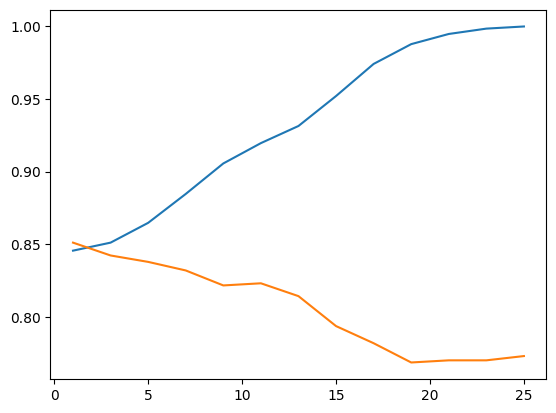

In [ ]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "training")
plt.plot(depth_hyperparams, validation_acc, label = "val")

In [ ]:
model2 = make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),

    DecisionTreeClassifier(max_depth=1,random_state=42)
)
# Fit model to training data
model2.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [ ]:
model2.score(X_test,y_test)

0.4834905660377358

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(4586, 15)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,52,4.0,1,20.0,0.0,0,1,0,225.0,156.0,98.0,30.93,80.0,100.0
1,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
2,0,51,2.0,1,6.0,0.0,0,0,0,190.0,131.5,89.0,23.66,92.0,100.0
3,1,60,1.0,0,0.0,0.0,0,0,0,264.0,137.0,80.0,29.99,65.0,58.0
4,0,40,3.0,1,15.0,0.0,0,0,0,304.0,121.0,88.0,22.52,60.0,80.0


In [ ]:
clf = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        RandomForestClassifier()

)
print(clf)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])


In [ ]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.97167756 0.97709924 0.97709924 0.9738277  0.97600872]


In [ ]:
params = {
    "simpleimputer__strategy": ["mean","median"],
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)



}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [ ]:
model =  GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs = -1,
    verbose=1
)

In [ ]:
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs = -1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.184801,0.005324,0.016563,0.004786,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.900871,0.890949,0.904035,0.913850,0.878953,0.897732,0.011900,23
1,0.186938,0.007081,0.012875,0.001788,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.892157,0.893130,0.898582,0.906216,0.889858,0.895989,0.005861,24
2,0.377759,0.031428,0.022164,0.004072,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.901961,0.894220,0.898582,0.916031,0.881134,0.898386,0.011306,22
3,0.566022,0.097864,0.034959,0.002700,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.899782,0.900763,0.899673,0.911668,0.884406,0.899258,0.008687,21
4,0.910176,0.204323,0.032552,0.008920,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.898693,0.912759,0.898582,0.918212,0.894220,0.904493,0.009280,20
5,0.522181,0.009043,0.026029,0.001664,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.909586,0.905125,0.904035,0.911668,0.900763,0.906236,0.003918,19
6,0.223065,0.015093,0.013493,0.000357,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.969499,0.965104,0.969466,0.968375,0.962923,0.967073,0.002623,16
7,0.217392,0.003445,0.013056,0.000173,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.961874,0.966194,0.967285,0.959651,0.972737,0.965548,0.004547,18
8,0.411534,0.007441,0.021706,0.001047,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.968410,0.972737,0.974918,0.969466,0.970556,0.971217,0.002341,11
9,0.413587,0.006045,0.020936,0.001158,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.976035,0.971647,0.978190,0.965104,0.970556,0.972306,0.004558,8


In [ ]:
acc_train = model.score(X_train_over,y_train_over)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8396


In [ ]:
model.best_estimator_

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50))])

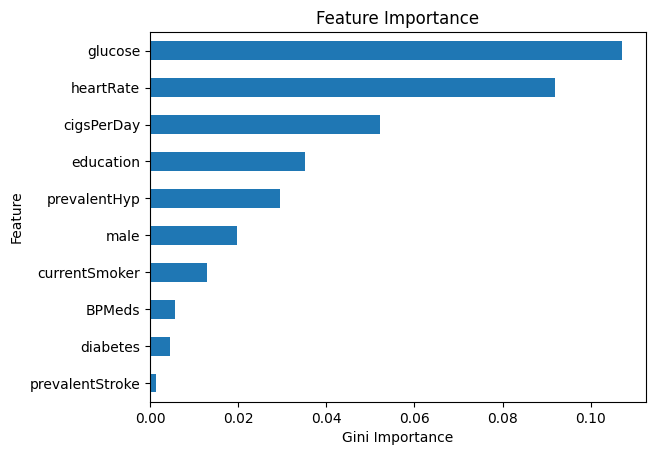

In [ ]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()
# Plot 10 most important features

feat_imp.head(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
c = ConfusionMatrixWidget(model, X_test, y_test)
c.show()

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0)

In [ ]:
clfgf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier()
)



In [ ]:
paramsg = {
    "simpleimputer__strategy": ["mean","median"],
    "gradientboostingclassifier__n_estimators": range(20,31,5),
    "gradientboostingclassifier__max_depth": range(2,5)



}

paramsg

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [ ]:
modelgf =  GridSearchCV(
    clfgf,
    param_grid=paramsg,
    cv=5,
    n_jobs = -1,
    verbose=1
)


In [ ]:
modelgf.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
results = pd.DataFrame(modelgf.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,1.404342,0.406473,0.025272,0.012798,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.745098,0.731734,0.739368,0.745911,0.717557,0.735933,0.010494,1
17,0.789716,0.076385,0.012434,0.008356,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.742919,0.726281,0.738277,0.741549,0.724100,0.734625,0.007880,2
15,0.751536,0.136692,0.026410,0.013825,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.741830,0.721919,0.736096,0.740458,0.714286,0.730918,0.010904,3
14,0.573433,0.105019,0.013445,0.006814,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.737473,0.730643,0.730643,0.726281,0.724100,0.729828,0.004586,4
13,0.517168,0.117922,0.011875,0.003860,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.742919,0.721919,0.730643,0.727372,0.706652,0.725901,0.011838,5
12,0.533603,0.099966,0.017360,0.006973,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.727669,0.718648,0.728462,0.724100,0.718648,0.723505,0.004230,6
11,0.529881,0.108294,0.014769,0.004292,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.714597,0.705562,0.705562,0.714286,0.695747,0.707151,0.006949,7
10,0.630148,0.053870,0.012335,0.006442,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.715686,0.695747,0.701200,0.703381,0.699019,0.703006,0.006823,8
7,0.611473,0.168802,0.015597,0.005676,3,20,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.701525,0.701200,0.702290,0.697928,0.683751,0.697339,0.006956,9
9,0.542375,0.173977,0.009497,0.006901,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.706972,0.702290,0.695747,0.703381,0.678299,0.697338,0.010187,10


In [ ]:
acc_train = modelgf.score(X_train_over,y_train_over)
acc_test = modelgf.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7793
Test Accuracy: 0.6356


In [ ]:
acc_train = model.score(X_train_over,y_train_over)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8396


In [ ]:
model1 = make_pipeline(
    SimpleImputer(),
    OneHotEncoder(),
    LogisticRegression(max_iter=1000,solver= "liblinear")
)
model1.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('onehotencoder', OneHotEncoder(cols=[])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
model1.score(X_test,y_test)

0.6474056603773585

In [ ]:
features = model1.named_steps["onehotencoder"].get_feature_names_out()
importances = model1.named_steps["logisticregression"].coef_[0]

In [ ]:
features

array(['Age', 'BusinessTravel_1', 'BusinessTravel_2', 'BusinessTravel_3',
       'DailyRate', 'Department_1', 'Department_2', 'Department_3',
       'DistanceFromHome', 'Education', 'EducationField_1',
       'EducationField_2', 'EducationField_3', 'EducationField_4',
       'EducationField_5', 'EducationField_6', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender_1',
       'Gender_2', 'HourlyRate', 'JobInvolvement', 'JobRole_1',
       'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6',
       'JobRole_7', 'JobRole_8', 'JobRole_9', 'JobSatisfaction',
       'MaritalStatus_1', 'MaritalStatus_2', 'MaritalStatus_3',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18_1',
       'OverTime_1', 'OverTime_2', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'], dtype=ob

In [ ]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

OverTime_1                 0.576298
JobInvolvement             0.691543
EnvironmentSatisfaction    0.708235
StockOptionLevel           0.725484
JobSatisfaction            0.742472
dtype: float64

<Axes: >

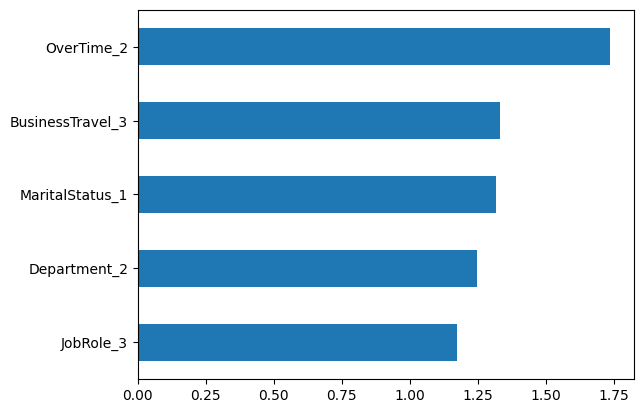

In [ ]:
odds_ratios.tail().plot(kind="barh")

<Axes: >

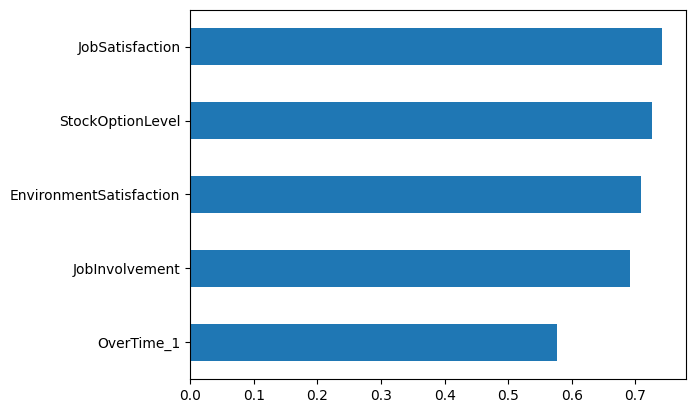

In [ ]:
odds_ratios.head().plot(kind="barh")

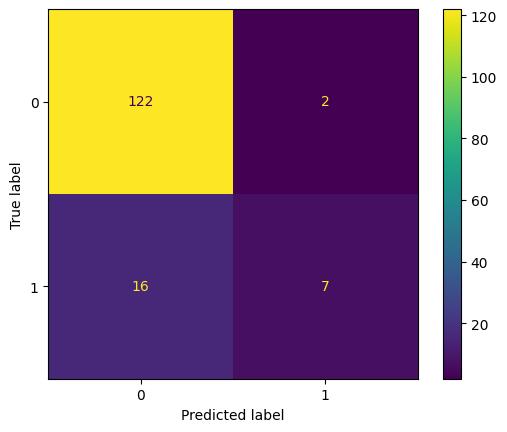

In [ ]:
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test);

In [ ]:
probabilities = model1.predict_proba(X_test)[:, 1]
default_predictions = (probabilities >= 0.5).astype(int)
default_cm = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold 0.5):")
print(default_cm)


adjusted_threshold = 0.6
adjusted_predictions = (probabilities >= adjusted_threshold).astype(int)
adjusted_cm = confusion_matrix(y_test, adjusted_predictions)
print("\nConfusion Matrix (Adjusted Threshold 0.7):")
print(adjusted_cm)

Confusion Matrix (Default Threshold 0.5):
[[122   2]
 [ 16   7]]

Confusion Matrix (Adjusted Threshold 0.7):
[[124   0]
 [ 17   6]]
